# Tuning Fork Design

By Corey Clayton

Tuning forks have been designed and constructed for hundreds of years. The topic is well studied and the science is mature. This document is meant to crystalize an exploration of the concept and provide some practical insight in to how one might actually design and build one.

Topics in machine tools and fabrication techniques are beyond the scope of this document.




## The Calculation
### Frequency and Length

A good place to start is Wikipedia. As of December 2016, it is the only web source on this topic.

Tuning fork equation [from Wikipedia](https://en.wikipedia.org/wiki/Tuning_fork#Calculation_of_frequency) :

$$ f  = \frac{1.875^2}{2\pi l^2} \sqrt\frac{EI}{\rho A} $$

In our case we want to design a fork for a given frequency. Thus we can rewrite the equation as:

$$ l^2  = \frac{1.875^2}{2\pi f} \sqrt\frac{EI}{\rho A} $$ 
or 
$$ l  = \sqrt{\frac{1.875^2}{2\pi f} \sqrt\frac{EI}{\rho A}} $$ 

simplified:

$$ l  = \sqrt{\frac{k}{f} \sqrt\frac{EI}{\rho A}} $$ 

Then if we consider our material (Steel for example), Young's modulus, $E$, and the density, $\rho$, become constants.

$$ m = \frac{E}{\rho} $$ 

Giving:

$$ l  = \sqrt{ \frac{k}{f} \sqrt{ m \frac{I}{A} } } $$ 


### Second Moment of Area

If we consider our tuning fork to have rectangular tines defined by a width $w$ and height $h$, we can examine it's second moment. Once again, [Wikipedia](https://en.wikipedia.org/wiki/Second_moment_of_area#Rectangle_with_centroid_at_the_origin) gives us the equations for $I$:

$$ I_{x} = \frac{w h^3}{12} $$

$$ I_{y} = \frac{w^3 h}{12} $$

Since we are mainly concerned with motion in the x axis (the tines moving to and from each other) we can substitute $I_{x}$ in to the main equation:

$$ l  = \sqrt{ \frac{k}{f} \sqrt{ m \frac{\frac{w h^3}{12}}{A} } } $$ 

Knowing that $A = w h$ gives:

$$ l  = \sqrt{ \frac{k}{f} \sqrt{ m \frac{\frac{w h^3}{12}}{w h} } } 
= \sqrt{ \frac{k}{f} \sqrt{ \frac{m}{12} \frac{w h^3}{w h} } } $$

Which simplifies to

$$ l = \sqrt{ \frac{k}{f} \sqrt{ \frac{m h^2}{12} } } $$


One interesting observation about this simplified equation is that the $w$ dimention has been cancelled out. This tells us that the $h$ dimention totally dominates the behaviour here.

## Analysis

In order to analyze and avoid error prone hand calculation, a python program was written to facilitate this document. The sources are available online [here](https://github.com/C-o-r-E/tuningFish).

### Frequency and Length

We can plot a graph showing the relationship between frequency and length in a given material. In this case we will use Steel.

In [1]:
from TuningFork import *

import matplotlib
import matplotlib.pyplot as plt

import numpy as np
from pylab import *

steel_tine = RectangularTine(in2m(1/2), in2m(1/4), Steel)

simple_calc = lambda t: 1000 * calc_fork_len(t, steel_tine)
vfunc = np.vectorize(simple_calc)

x = np.linspace(1, 2000, 1000)
y = vfunc(x)



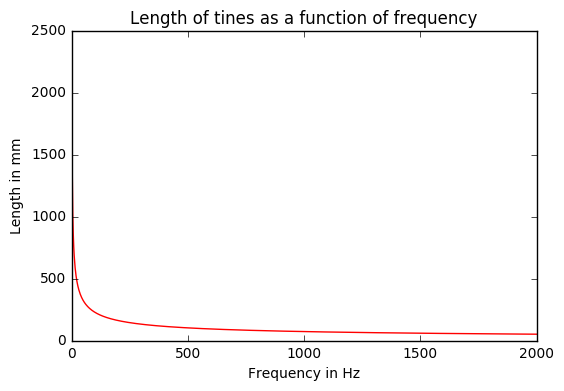

In [2]:
fig, axes = plt.subplots()

axes.plot(x, y, 'r')
axes.set_xlabel('Frequency in Hz')
axes.set_ylabel('Length in mm')
axes.set_title('Length of tines as a function of frequency');
fig

We can see that the length grows very rapidly close to zero and seemingly very slow towards 2kHz. A closer inspection should shed some light. Let us look at two regions more closely:

* 20Hz to 200Hz
* 200Hz to 2kHz

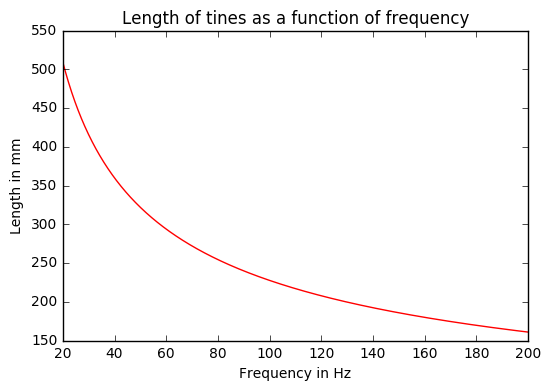

In [3]:
x = np.linspace(20, 200, 1000)
y = vfunc(x)

fig, axes = plt.subplots()

axes.plot(x, y, 'r')
axes.set_xlabel('Frequency in Hz')
axes.set_ylabel('Length in mm')
axes.set_title('Length of tines as a function of frequency');
fig

Between 20Hz and 200Hz we can see that although the lower frequencies correspond to much higher lengths, they should translate to tuning forks that are manufactuarable.

The reason 20Hz was chosen is because the human audible range is commonly known to be 20Hz to 20kHz.

Let's examine the higher frequencies now.

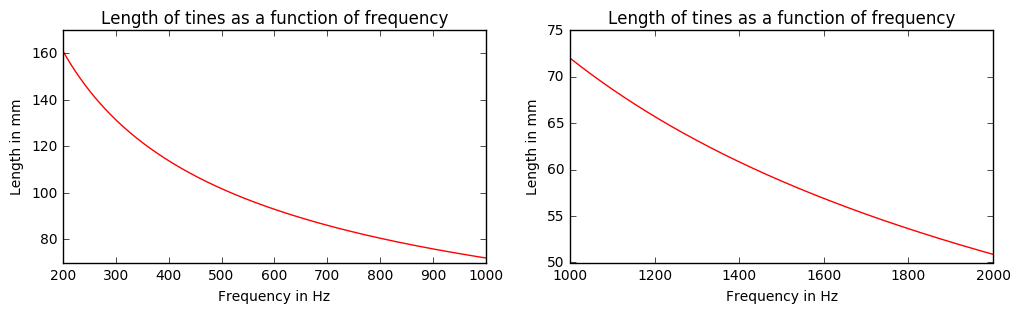

In [4]:
x = np.linspace(200, 1000, 1000)
y = vfunc(x)

x2 = np.linspace(1000, 2000, 1000)
y2 = vfunc(x2)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,3))

axes[0].plot(x, y, 'r')
axes[1].plot(x2, y2, 'r')
for a in axes:
    a.set_xlabel('Frequency in Hz')
    a.set_ylabel('Length in mm')
    a.set_title('Length of tines as a function of frequency');
fig

In [5]:
simple_calc(18794.5451467141) - simple_calc(19912.1269582132)

0.47250784441608573

In [6]:
simple_calc(440)

108.4777677234384

We can see that where the first graph apeared almost flat, there is indeed significant change in the length of the tines as frequency rises. If we look at the two highest notes listed on [this page](http://www.deimos.ca/notefreqs/) (18794.54Hz and 19912.12Hz) below 2kHz, and compare their lengths, we find that there would be a difference of ~0.47mm. It might be difficult but definitely feasable in the realm of precise machining.

However most the most common tuning fork (440Hz) would require a tine length of ~108.47mm which is seemingly more easily made.

## Analysis in more dimentions


We can gain more insight in to the constuction of tuning forks if we look at 2 variables at once:
* The desired frequency, $f$
* The tine thickness, $h$

Visualizing such a relationship can be shown as a surface:

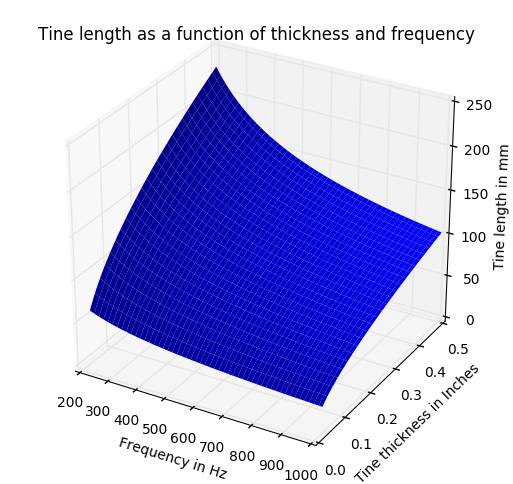

In [7]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

def cl_given_th_f(f, h):
    t = RectangularTine(in2m(1/2), in2m(h), Steel)
    return 1000 * calc_fork_len(f, t)

vfunc = np.vectorize(cl_given_th_f)


phi_p = np.linspace(200, 1000, 200)
phi_m = np.linspace(1/32, 1/2, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = vfunc(X,Y)

fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_title('Tine length as a function of thickness and frequency')
ax.set_xlabel('Frequency in Hz')
ax.set_ylabel('Tine thickness in Inches')
ax.set_zlabel('Tine length in mm')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)
fig

This graph gives us an idea about how a tuning fork might look as we adjust the frequency and tine thickness. However its difficult to extract specifics from this viewpoint. A heatmap is perhaps more practical:

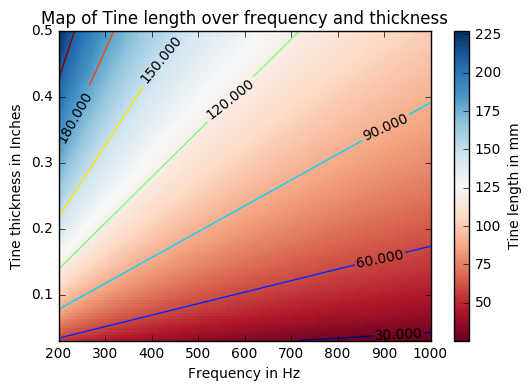

In [8]:
fig, ax = plt.subplots()

ax.set_title("Map of Tine length over frequency and thickness")
ax.set_xlabel("Frequency in Hz")
ax.set_ylabel("Tine thickness in Inches")
cs = ax.contour(X,Y,Z)
plt.clabel(cs, inline=1, fontsize=10, colors="black")

p = ax.pcolor(X, Y, Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)
cb.set_label("Tine length in mm")
fig

Now we can extract more practical information. Following the contour lines show us the different combinations of thickness and frequency required to produce a tuning fork of a desired length. If we have a maximum length of stock material for example, we can see on the graph were we might want to adjust the thickness to achieve a desired frequency.

The above graph shows only the lower frequencies for the same reason we broke earlier graphs in to parts. The higher frequencies are shown below.

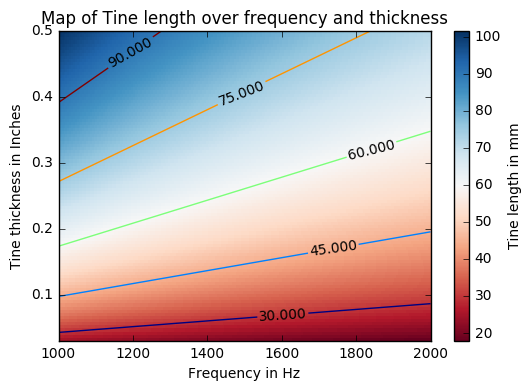

In [9]:
phi_p = np.linspace(1000, 2000, 200)
phi_m = np.linspace(1/32, 1/2, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = vfunc(X,Y)

fig, ax = plt.subplots()

ax.set_title("Map of Tine length over frequency and thickness")
ax.set_xlabel("Frequency in Hz")
ax.set_ylabel("Tine thickness in Inches")
cs = ax.contour(X,Y,Z)
plt.clabel(cs, inline=1, fontsize=10, colors="black")

p = ax.pcolor(X, Y, Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)
cb.set_label("Tine length in mm")
fig

## Conclusions

After some analysis, we can better reason about the geometry involved with the design of tuning forks. We have seen how tuning forks become impractical at very low frequencies yet should be easily machinable over the human audible range. At higher frequencies errors in precision appear to become more noticable.

Additionally we produced some visualizations to show how the frequency, tine length and thickness are related. It seems that heatmaps with contour lines may be particularly useful in guiding tuning fork design.



## Bonus
### Designing a Concrete Tuning Fork

Let's say we want to design a tuning fork out of Concrete. This would be a poor choice in material due to the strength of concrete being very weak to tension. Hitting a tuning fork definitely involves deflection and tensile loads in the tines. Howerver this doesnt stop us from tyring! 

Intuition about concrete says that at the very small scale, it crumbles in hand. So we probably cant have 1/8" thick tines. If we take the reference values of $E$ and $\rho$, looking at a graph of frequency vs length shows us that it might be possible to build.

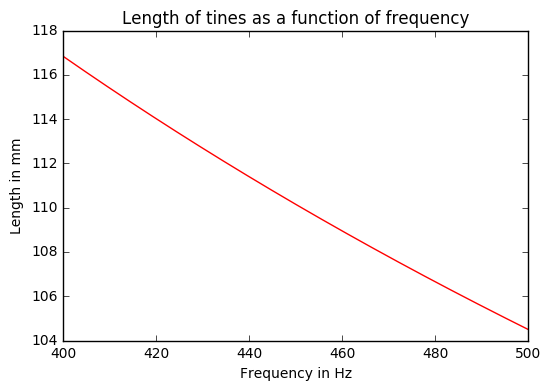

In [10]:
stupid_tine = RectangularTine(in2m(1), in2m(1/2), Concrete)

simple_calc = lambda t: 1000 * calc_fork_len(t, stupid_tine)
vfunc = np.vectorize(simple_calc)

x = np.linspace(400, 500, 1000)
y = vfunc(x)

fig, axes = plt.subplots()

axes.plot(x, y, 'r')
axes.set_xlabel('Frequency in Hz')
axes.set_ylabel('Length in mm')
axes.set_title('Length of tines as a function of frequency');
fig

The above graph shows that for a 1/2 inch thick concrete fork, we would need to make it close to 112mm long for the standard 440Hz frequency.

The graph below will attempt to illustrate how changing the thickness will effect the length needed if we chose our target frequency to be 440Hz.

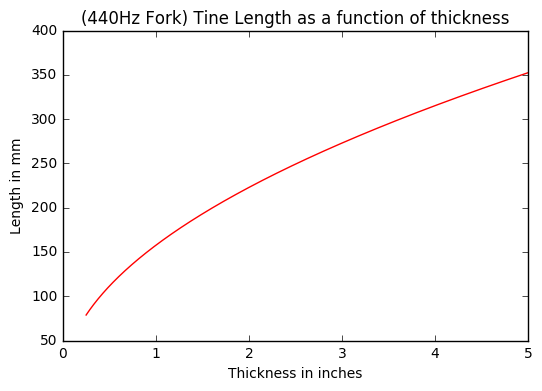

In [13]:
def calc_len_dumb_idea(thick):
    t = RectangularTine(in2m(1/2), in2m(thick), Concrete)
    return 1000 * calc_fork_len(440, t)

vfunc = np.vectorize(calc_len_dumb_idea)

x = np.linspace(1/4, 5, 1000)
y = vfunc(x)

fig, axes = plt.subplots()

axes.plot(x, y, 'r')
axes.set_xlabel('Thickness in inches')
axes.set_ylabel('Length in mm')
axes.set_title('(440Hz Fork) Tine Length as a function of thickness');
fig

In [17]:
calc_len_dumb_idea(1.5)

192.94596465256515

A concrete tuning fork of thickness 1.5 inches will need to be almost 193mm long. At this size it should be fairly easy to build, handle and test. The next step will be to go out and try it.